Clase 7
===

* Ajustar modelo a variables experimentales
* Encontrar la solución más semejante a datos experimentales


Medir calidad de las simulaciones
--------------------------------------

Si conocemos el valor de uno o varios flujos metabólicos podemos ajustar nuestro modelo a estos datos. Hay varias maneras de hacer esto, la primera es simplemente fijar el valor de los flujos como veremos a continuación. 

A modo de ejemplo usaremos *Saccharomyces cerevisae* iMM904 [(descargar aquí)](https://github.com/modcommet/Clases/blob/master/iMM904.xml) y los flujos experimentales compilados por [García et al 2012](https://journals.plos.org/plosone/article?id=10.1371%2Fjournal.pone.0043006)


In [148]:
# Let's import the yeast model
import cobra
model = cobra.io.read_sbml_model("iWFL_1372.xml")

In [31]:
# And check the solution using default parameters
solution=model.optimize()
model.summary()

IN FLUXES            OUT FLUXES    OBJECTIVES
-------------------  ------------  ----------------------
o2_e      17.6       h2o_e  45.6   BIOMASS_Ec_i...  0.982
nh4_e     10.6       co2_e  19.7
glc__D_e  10         h_e     9.03
pi_e       0.948
so4_e      0.248
k_e        0.192
fe2_e      0.0158
mg2_e      0.00852
ca2_e      0.00511
cl_e       0.00511
cu2_e      0.000697
mn2_e      0.000679
zn2_e      0.000335
ni2_e      0.000317
mobd_e     0.000127


In [135]:
# Now, let's modify the ethanol flux
# First, lets find the reactions associated with ethanol
import re

def buscarMetabolito(nombreMetabolite):
    metabolites=[]
    for metabolite in model.metabolites:
        if re.match(nombreMetabolite,metabolite.name,re.IGNORECASE): 
            metabolites.append(metabolite)
    if len(metabolites)==0:
        print "Not found metabolite"
        return None
    else: #print "2 lets find the reactions associated with the name"
        for metabolite in metabolites:
            print "=================================="
            print metabolite.name, metabolite.id
            print "=================================="
            for reaction in model.metabolites.get_by_id(metabolite.id).reactions:
                print reaction
result=buscarMetabolito("pyruvate")

Pyruvate pyr_e
EX_pyr_e: pyr_e --> 
PYRtex: pyr_e <=> pyr_p
Pyruvate pyr_c
CHITOBpts: chitob_p + pep_c --> chit6p_c + pyr_c
ACLS: h_c + 2.0 pyr_c --> alac__S_c + co2_c
HOPNTAL: 4h2opntn_c --> acald_c + pyr_c
EDA: 2ddg6p_c --> g3p_c + pyr_c
ALATA_L: akg_c + ala__L_c <=> glu__L_c + pyr_c
CYSDDS: cys__D_c + h2o_c --> h2s_c + nh4_c + pyr_c
GLCRAL: 5dh4dglc_c --> 2h3oppan_c + pyr_c
ALATA_L2: ala__L_c + pydx5p_c --> pyam5p_c + pyr_c
DXPS: g3p_c + h_c + pyr_c --> co2_c + dxyl5p_c
PFOR: coa_c + fldox_c + h_c + pyr_c --> accoa_c + co2_c + fldrd_c
ANS: chor_c + gln__L_c --> anth_c + glu__L_c + h_c + pyr_c
ACHBS: 2obut_c + h_c + pyr_c --> 2ahbut_c + co2_c
CLBptspp: cellb_p + pep_c --> cellb6p_c + pyr_c
SERD_L: ser__L_c --> nh4_c + pyr_c
CYSTL: cyst__L_c + h2o_c --> hcys__L_c + nh4_c + pyr_c
PPS: atp_c + h2o_c + pyr_c --> amp_c + 2.0 h_c + pep_c + pi_c
ME1: mal__L_c + nad_c --> co2_c + nadh_c + pyr_c
SHCHCS3: 2sephchc_c --> 2shchc_c + pyr_c
DHEDAA: 24dhhed_c --> pyr_c + sucsal_c
VPAMTr_copy2: 3mob

In [149]:
# Fix the ethanol reaction flux and see how it affects the solution
# Fix a range for the ethanol reaction flux around +/-10% of the observed value
value=-10.6
model.reactions.get_by_id("EX_o2_e").upper_bound=value+0.1*value 
model.reactions.get_by_id("EX_o2_e").lower_bound=value-0.1*value

value=9.6
model.reactions.get_by_id("EX_co2_e").upper_bound=value+0.1*value 
model.reactions.get_by_id("EX_co2_e").lower_bound=value-0.1*value

value=0.8
model.reactions.get_by_id("EX_pyr_e").upper_bound=value+0.1*value 
model.reactions.get_by_id("EX_pyr_e").lower_bound=value-0.1*value

value=4.4
model.reactions.get_by_id("EX_ac_e").upper_bound=value+0.1*value 
model.reactions.get_by_id("EX_ac_e").lower_bound=value-0.1*value

value=-6.4
model.reactions.get_by_id("EX_glc__D_e").upper_bound=value+0.1*value 
model.reactions.get_by_id("EX_glc__D_e").lower_bound=value-0.1*value

solution=model.optimize()
model.summary()


IN FLUXES           OUT FLUXES    OBJECTIVES
------------------  ------------  ----------------------
o2_e      9.54      h2o_e  22.3   BIOMASS_Ec_i...  0.386
glc__D_e  5.76      co2_e   8.64
fe2_e     5.46      fe3_e   5.45
nh4_e     4.17      ac_e    3.96
pi_e      0.372     h_e     2.77
so4_e     0.0973    pyr_e   0.72
k_e       0.0753
mg2_e     0.00335
ca2_e     0.00201
cl_e      0.00201
cu2_e     0.000274
mn2_e     0.000267
zn2_e     0.000132
ni2_e     0.000125
mobd_e    4.98e-05


Es posible que errores de medición resulten en datos de flujos metabólicos que no son estequiometricamente compatibles. Para estos casos, una alternativa es fijar un rango de valores en lugar de un valor exacto. Por ejemplo:

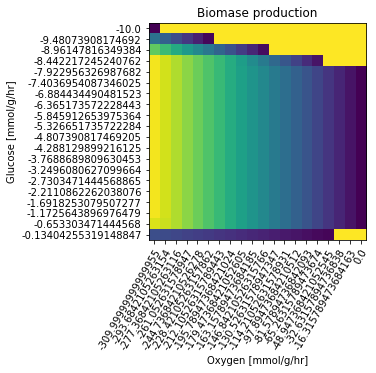

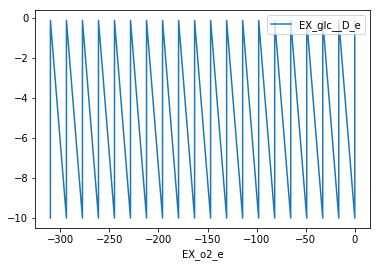

In [154]:
import cobra
model = cobra.io.read_sbml_model("iWFL_1372.xml")

import numpy as np
#Calcula prod_env
%matplotlib inline
import matplotlib.pyplot as plt
from cobra.flux_analysis import production_envelope
prod_env = production_envelope(model, ["EX_o2_e","EX_glc__D_e"])
# Extrae los valores de cada flux sin repetirlos

xlabels=np.unique(prod_env["EX_o2_e"])
ylabels=np.unique(prod_env["EX_glc__D_e"])
# Crea una matrix en donde guardar los valores de u
mat=np.zeros((20,20))
for i in range(20):
    mat[i,0:20]=prod_env["flux_maximum"][i*20:(i+1)*20]
#Crea un heatmap de la matriz
fig,ax=plt.subplots()
ax.set_xticks(np.arange(len(xlabels)))
ax.set_yticks(np.arange(len(ylabels)))
# ... and label them with the respective list entries
ax.set_xticklabels(xlabels)
ax.set_yticklabels(ylabels)    
plt.setp(ax.get_xticklabels(), rotation=60, ha="right",
         rotation_mode="anchor")
ax.set_title("Biomase production")
ax.set_ylabel("Glucose [mmol/g/hr]")
ax.set_xlabel("Oxygen [mmol/g/hr]")
mat[np.isnan(mat)]=1
ax.imshow(mat)



prod_env.plot(kind='line', x='EX_o2_e', y='EX_glc__D_e')


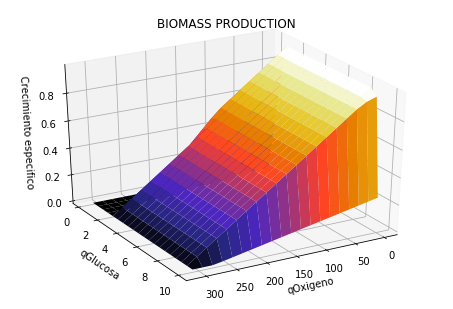

,carbon_source,carbon_yield_maximum,carbon_yield_minimum,flux_maximum,flux_minimum,mass_yield_maximum,mass_yield_minimum,EX_o2_e,EX_glc__D_e
0,EX_glc__D_e,3.587507e-13,0.0,0.0,0.0,NaN,NaN,-310.0,-10.000000
1,EX_glc__D_e,NaN,NaN,NaN,NaN,NaN,NaN,-310.0,-9.480739
2,EX_glc__D_e,NaN,NaN,NaN,NaN,NaN,NaN,-310.0,-8.961478
3,EX_glc__D_e,NaN,NaN,NaN,NaN,NaN,NaN,-310.0,-8.442217
4,EX_glc__D_e,NaN,NaN,NaN,NaN,NaN,NaN,-310.0,-7.922956


In [153]:
import cobra.test
import cobra
import numpy as np
import matplotlib.pyplot as plt
import re

from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from cobra.flux_analysis import production_envelope
from numpy import zeros
%matplotlib inline
from cobra.flux_analysis import production_envelope
prod_env = production_envelope(model,["EX_o2_e","EX_glc__D_e"])
prod_env.head(21)
X      = np.unique(-1*prod_env["EX_o2_e"])   
Y      = np.unique(-1*prod_env["EX_glc__D_e"])        
data_Z = prod_env["flux_maximum"]


num_dat= len(X)                                   
matriz = np.zeros((num_dat,num_dat))
for i in range(num_dat):
    matriz[i,:] = data_Z[num_dat*i:num_dat*(i+1)]
matriz[np.isnan(matriz)] = 0.0                   


# Generando grafico 3D
fig  = plt.figure()
ax   = Axes3D(fig)
X, Y = np.meshgrid(X, Y)
surf = ax.plot_surface(X, Y, matriz, rstride=1, cstride=1, linewidth=1, antialiased=True, cmap=plt.cm.CMRmap)
# Formato adicional del grafico
ax.view_init(elev =None, azim =60)
ax.set_xlabel("qOxigeno")
ax.set_ylabel("qGlucosa")
ax.set_zlabel("Crecimiento especifico")
plt.title("BIOMASS PRODUCTION")


plt.show()

prod_env.head()

Ejercicio
---------

Usando los valores experimentales compilados por [García et al 2012](https://journals.plos.org/plosone/article?id=10.1371%2Fjournal.pone.0043006) desde la referencia [20] (ver la columna **References** en Table_S1.doc):

1. Fija la reacción de consumo de glucosa, succinato, ethanol, y piruvato a datos experimentales (haciendo 1 esto debería ser trivial).

Evaluación de la calidad de las predicciones
------------------

Para evaluar que tan cercana es la simulación de FBA a los datos experimentales podemos usar la norma Euclideana la cual mide la distancia entre dos puntos en el hiperespacio:
    
\begin{align}
    \mbox{Norma Euclideana}=\sum_i (x_i-y_i)^2
\end{align}

La cual puede ser escrita usando notación vectorial:

\begin{align}
    \mbox{Norma Euclideana} = (x-y)^T(x-y)
\end{align}


Ejercicio
-----------

Escribe una función para determinar la distancia entre los datos simulados y los experimentales (usa los datos de la Ref 20) usando la norma Euclideana como métrica.


In [53]:
import numpy as np
v_predicted=np.array([solution.fluxes["EX_etoh_e"],solution.fluxes["EX_succ_e"],solution.fluxes["EX_pyr_e"],solution.fluxes["EX_glc__D_e"]])
v_expected=np.array([3.632,0.0132,0.0006,-3.002])
d=v_expected-v_predicted
euclidian_norm=np.dot(d,d)
print euclidian_norm

    

0.18431549190994578


In [72]:
print "hola mundo"

hola mundo


Optimización en dos niveles
-------------------------------

Cuando un FBA tiene multiples soluciones es de interes encontrar aquella que más se asemeje a datos experimentales. Solo en ese caso sería justo evaluar la capacidad de predicción del modelo. Esto se puede hacer formulando una problema de optimización en dos niveles. Mientras que en el nivel más interno se busca maximizar biomasa (esta es la formulación regular de FBA), en el nivel más externo se minimiza la distancia entre flujos simulados y los experimentales.

\begin{align}
\mbox{min}\ & \sum_{i \in I} ||x_i-y_i|| \\
\mbox{s.a.} & \\
&\mbox{max}\  f(x)=c^Tx \\
&\ \mbox{s.a.}  \\
&\ Sx=0 \\
&\ LB<=x<=UB
\end{align}

En donde $\sum_{i \in I} ||x_i-y_i||$ corresponde a una métrica arbitraria, por ejemplo la norma Euclideana (otras opciones puede ser la suma de las diferencias en valores absolutos).

¿Cómo se puede resolver un problema de optimización que depende de otro problema de optimización? Respuesta, usando la [teoría de dualidad](https://en.wikipedia.org/wiki/Linear_programming#Duality) de la programación lineal. En terminos concretos, si tenemos un problema en formato estandar que llamaremos 'primal':

\begin{align}
\mbox{min}\  & c^Tx \\
\mbox{s.a.}&  \\
&\ Ax=b \\
&\ x \ge 0
\end{align}

entonces existe un problema 'dual':

\begin{align}
\mbox{max}\  & b^Ty \\
\mbox{s.a.} & \\
&\ A^Ty \le c
\end{align}

Si existe una solución del primero entonces existe una solución en el segundo y el valor de la función objetivo es el mismo. Esto es útil en un problema de optimización anidado ya que podemos transformar el problema de optimización interno en el siguiente conjunto de restricciones:

\begin{align}
& c^Tx = b^Ty \\
&\ Ax=b \\
&\ A^Ty \le c \\
&\ x \ge 0
\end{align}

Para aplicar esta técnica a FBA primero debemos transformar la formulación de FBA en el formato estandar, lo cual veremos en el pizarron como hacerlo.

Tarea
-------

Estudia el uso de esta técnica en el paper de [Burgard et al 2003](http://onlinelibrary.wiley.com/doi/10.1002/bit.10803/epdf).